In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from read_db.CH import Getch
import pandas as pd
import scipy.stats as stats

In [65]:
query_1 = """
SELECT user_id, exp_group,
  countIf(post_id, action='like') AS likes,
  countIf(post_id, action='view') AS views,
  round(likes / views, 4) AS ctr
FROM simulator.feed_actions
WHERE (toDate(time) BETWEEN '2021-11-08' AND '2021-11-14') AND exp_group in (2, 3)
GROUP BY user_id, exp_group
"""
data_all = Getch(query_1).df

In [66]:
data_all

,user_id,exp_group,likes,views,ctr
0,115383,3,27,160,0.1688
1,10326,3,7,61,0.1148
2,131473,2,16,101,0.1584
3,123580,3,11,72,0.1528
4,23985,2,8,34,0.2353
...,...,...,...,...,...
16845,122008,3,19,125,0.1520
16846,25383,2,3,28,0.1071
16847,122190,3,40,200,0.2000
16848,108927,2,13,54,0.2407


In [67]:
sns.set_style('whitegrid')
#sns.set()

In [68]:
df_2 = data_all[data_all.exp_group == 2].ctr
df_3 = data_all[data_all.exp_group == 3].ctr

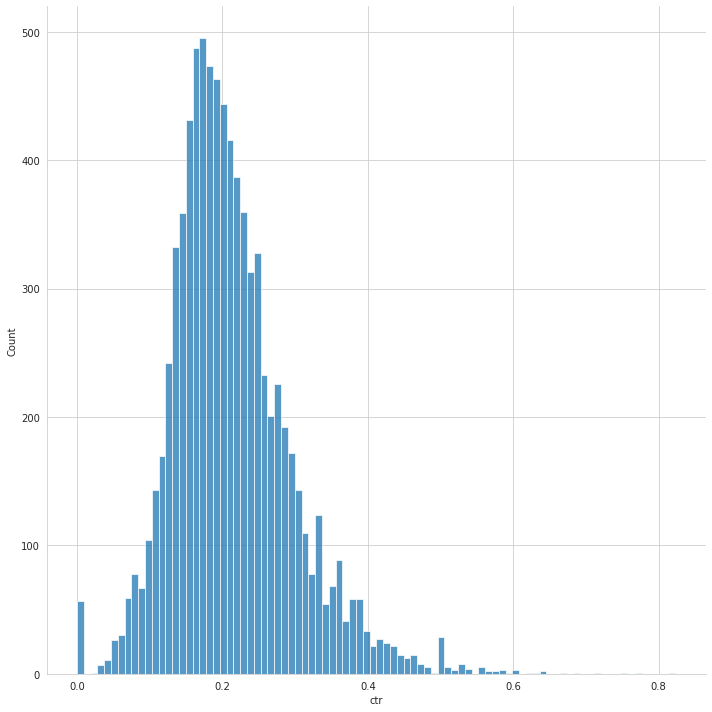

In [70]:
sns.displot(df_2, height=10)

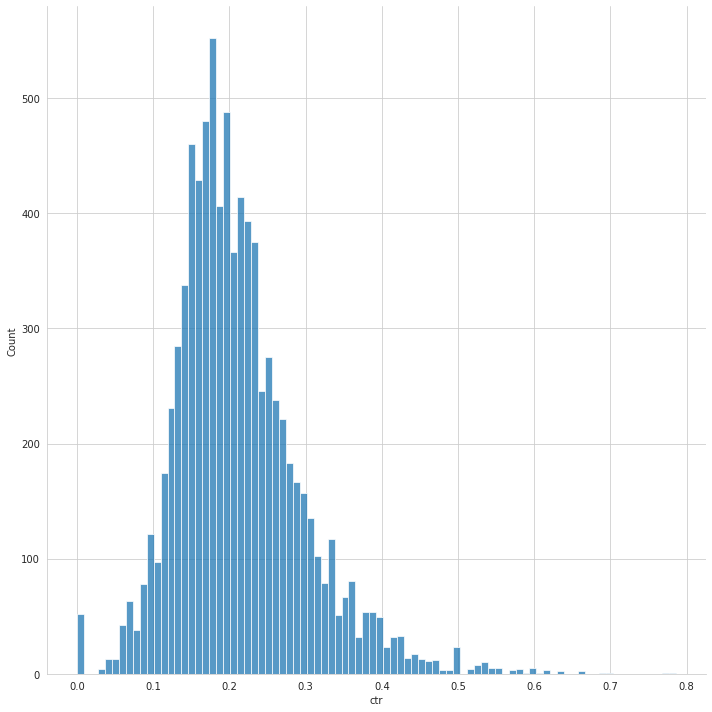

In [71]:
sns.displot(df_3, height=10)

In [74]:
stats.mannwhitneyu(df_3, df_2)

MannwhitneyuResult(statistic=35271340.0, pvalue=0.48922099382740425)

In [75]:
stats.ttest_ind(df_3, df_2)

Ttest_indResult(statistic=-0.2672653173920841, pvalue=0.789268159786294)

Функция симуляции проведения 10000 АА-тестов (через ttest) 

In [79]:
def fake_aa_t(df1, df2, n_samples = 10000, size_sample = 500):
    ttest_data = []
    for i in range(n_samples):
        resample1_data = df1.sample(n=size_sample, replace=True)
        resample2_data = df2.sample(n=size_sample, replace=True)
        ttest_data.append(stats.ttest_ind(resample1_data, resample2_data).pvalue)
    sns.displot(ttest_data, height=7)
    ser_tt = pd.Series(ttest_data)
    return ser_tt[ser_tt<=0.05].shape[0]/ser_tt.shape[0]

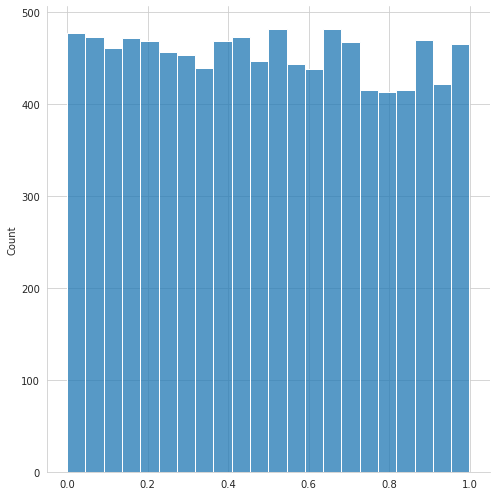

In [80]:
percent = fake_aa_t(df_2, df_3)*100

In [81]:
print('Процент p-values <= 0.05: ', percent)

Процент p-values <= 0.05:  5.25


Вывод: Распределение p-value равномерно, количество значений меньших 0.05 около 5%, следовательно, система сплитования работает корректно.

In [82]:
def fake_aa_mann(df1, df2, n_samples = 10000, size_sample = 500):
    mann_data = []
    for i in range(n_samples):
        resample1_data = df1.sample(n=size_sample, replace=True)
        resample2_data = df2.sample(n=size_sample, replace=True)
        mann_data.append(stats.mannwhitneyu(resample1_data, resample2_data).pvalue)
    sns.displot(mann_data, height=7)
    ser_mann = pd.Series(mann_data)
    return ser_mann[ser_mann <= 0.05].shape[0]/ser_mann.shape[0]

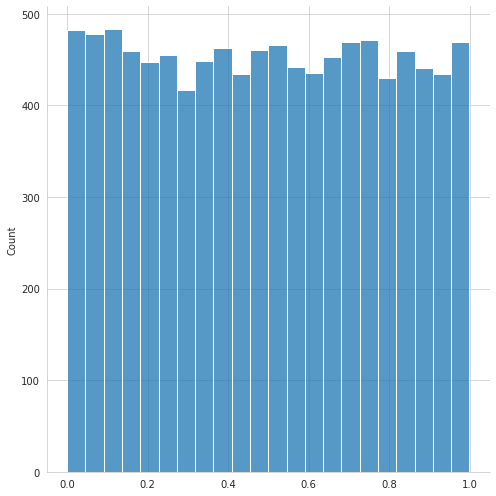

In [83]:
percent2 = fake_aa_mann(df_2, df_3)*100

In [84]:
print('Процент p-values <= 0.05: ', percent2)

Процент p-values <= 0.05:  5.2299999999999995


Вывод: Получили аналогичные результаты как и при использовании t-test. Система сплитования работает корректно.